### Deep Learning: Classification
___

#### Summary:

Deep Learning has grown in popularity recently due to better GPUs and the large amount of data we have access to. Combining the large amount of data with better GPUs, we are able to train deep neural networks in a reasonable amount of time that outperform traditional machine learning models such as SVM, Naive Bayes and K-Nearest Neighbor.

When building a deep neural network, it is common to use APIs like Tensorflow and Keras. Tensorflow is an API that runs on top of Python, and Keras is an API that runs on top of Tensorflow. When building a neural network, Keras will usually contain all the functions we need.
___
#### This notebook will include:
1. Softmax Regression
2. 3-Layer Standard Neural Network (Multilayer Perceptron)
3. 8-Layer Standard Neural Network
4. 3-Layer Convolutional Network
5. 8-Layer Convolutional Network
6. Random Forest Classification
___
#### Reference: 

Much of what is in this notebook was learned from the Deep Learning Specialization Coursera course by Andrew Ng and from the Tensorflow tutorial at https://www.tensorflow.org/get_started/mnist/pros 

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
X_train: (55000, 784)
y_train: (55000, 10)
X_val: (5000, 784)
y_val: (5000, 10)
X_test: (10000, 784)
y_test: (10000, 10)


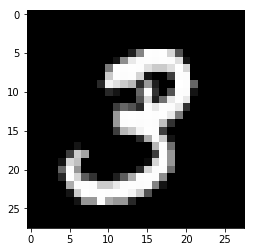

In [10]:
"""
The dataset that will be used for this notebook is the MNIST dataset which consists of hand-drawn digits 
ranging from 0 to 9. The dataset is separated into 55000 training examples, 5000 validation examples
and 10000 test examples. Each example consists of 784 input features corresponding to the 784 pixel values 
of the 28x28 sized image. The dataset has already been preprocessed (divided by 255) so there is no need
for further preprocessing.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Importing the dataset
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True)

# Printing the dataset shape
print('X_train:', dataset.train.images.shape)
print('y_train:', dataset.train.labels.shape)
print('X_val:', dataset.validation.images.shape)
print('y_val:', dataset.validation.labels.shape)
print('X_test:', dataset.test.images.shape)
print('y_test:', dataset.test.labels.shape)

# Displaying an example from the dataset
sample = Image.fromarray(255*dataset.train.images[1, :].reshape(28,28))
plt.imshow(sample)

In [5]:
# Softmax regression
"""
The simplest classification algorithm for multiple labels is softmax regression. It is a neural network 
with just 1 layer and hence cannot learn complex features.
"""

import tensorflow as tf

# Import the data
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Input to model
X = tf.placeholder(tf.float32, [None, 784])

# Output of model
y = tf.placeholder(tf.float32, [None, 10])

# Parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Logit
Z = tf.matmul(X, W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z)) #Cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(10000):
    batch = dataset.train.next_batch(100)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    sess.run(train_step, feed_dict={X: batch[0], y: batch[1]})
    
print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.84
step 200, training accuracy 0.84
step 300, training accuracy 0.89
step 400, training accuracy 0.88
step 500, training accuracy 0.92
step 600, training accuracy 0.89
step 700, training accuracy 0.94
step 800, training accuracy 0.88
step 900, training accuracy 0.91
step 1000, training accuracy 0.93
step 1100, training accuracy 0.91
step 1200, training accuracy 0.92
step 1300, training accuracy 0.93
step 1400, training accuracy 0.96
step 1500, training accuracy 0.89
step 1600, training accuracy 0.85
step 1700, training accuracy 0.91
step 1800, training accuracy 0.94
step 1900, training accuracy 0.95
step 2000, training accuracy 0.89
step 2100, training accuracy 0.93
step 2200, training accuracy 0.89
step 2300, training 

In [6]:
# Support Vector Machine with Gaussian Kernel
"""
The SVM classifier with a Gaussian kernel works well for most classification problems, however
it is computationally expensive for very large training sets. That is why for this problem we 
use a subset of the training data.
"""
# Import libraries
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn import svm

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/")

#Train on a sample of 10000 training examples (SVM takes long to train with a large training set)
X_train_sample, y_train_sample = dataset.train.next_batch(10000)
classifier = svm.SVC(kernel = 'rbf', decision_function_shape='ovr')
classifier.fit(X_train_sample, y_train_sample) 
print('Training accuracy %g' % classifier.score(X_train_sample, y_train_sample))

# Evaluating the SVM classifier
print('Test accuracy %g' % classifier.score(dataset.test.images, dataset.test.labels)) 

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
Training accuracy 0.925
Test accuracy 0.9226


In [7]:
#Multi-layer FC Neural Network
"""
Standard Neural Network with many layers.
"""
# Import libraries
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Define parameter initialization functions
def weight_variable(shape): #symmetry breaking
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape): #avoid dead neurons
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Create placeholders
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#First FC layer (20 hidden units)
W_fc1 = weight_variable([784, 20]) #weights between input layer and layer 1 (20 units)
b_fc1 = bias_variable([20]) #bias for each hidden unit in layer 1
A_fc1 = tf.nn.relu(tf.matmul(X, W_fc1) + b_fc1) #activation of layer 1

#Second FC layer (20 hidden units)
W_fc2 = weight_variable([20, 20]) #weights between layer 1 and layer 2 (20 units)
b_fc2 = bias_variable([20]) #bias for each hidden unit in layer 2
A_fc2 = tf.nn.relu(tf.matmul(A_fc1, W_fc2) + b_fc2) #activation of layer 2

#Third FC layer (20 hidden units)
W_fc3 = weight_variable([20, 20]) #weights between layer 2 and layer 3 (20 units)
b_fc3 = bias_variable([20]) #bias for each hidden unit in layer 3
A_fc3 = tf.nn.relu(tf.matmul(A_fc2, W_fc3) + b_fc3) #activation of layer 3

#Output softmax layer (10 units corresponding to the labels 0-9)
W_fc4 = weight_variable([20, 10]) #weights between layer 3 and output layer (10 units)
b_fc4 = bias_variable([10]) #bias for each units in output layer
Z_fc4 = tf.matmul(A_fc3, W_fc4) + b_fc4

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z_fc4)) #Cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z_fc4, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #accuracy

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(10000):
    batch = dataset.train.next_batch(100)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    sess.run(train_step, feed_dict={X: batch[0], y: batch[1]})

print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.11
step 100, training accuracy 0.68
step 200, training accuracy 0.85
step 300, training accuracy 0.88
step 400, training accuracy 0.83
step 500, training accuracy 0.84
step 600, training accuracy 0.88
step 700, training accuracy 0.85
step 800, training accuracy 0.87
step 900, training accuracy 0.94
step 1000, training accuracy 0.93
step 1100, training accuracy 0.98
step 1200, training accuracy 0.92
step 1300, training accuracy 0.9
step 1400, training accuracy 0.93
step 1500, training accuracy 0.89
step 1600, training accuracy 0.91
step 1700, training accuracy 0.97
step 1800, training accuracy 0.95
step 1900, training accuracy 0.93
step 2000, training accuracy 0.88
step 2100, training accuracy 0.94
step 2200, training accuracy 0.93
step 2300, training a

In [1]:
# Multi-layer CNN
"""
A CNN (instead of a standard NN) is used for computer vision tasks because it performs better 
due to parameter sharing and sparsity of connections. The following example is based on an example from tensorflow.org.
"""
# Import libraries
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Define parameter initialization functions
def weight_variable(shape): #symmetry breaking
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape): #avoid dead neurons
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(X, W): 
    return tf.nn.conv2d(X, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#First convolutional layer (32 5x5x1 filters > max-pool)
X_image = tf.reshape(X, [-1, 28, 28, 1]) #reshape X to be (#examples, 28, 28, 1)
W_conv1 = weight_variable([5, 5, 1, 32]) #32 filters of shape (5,5,1)
b_conv1 = bias_variable([32]) #bias for each of the 32 filters

h_conv1 = tf.nn.relu(conv2d(X_image, W_conv1) + b_conv1) #(28, 28, 32)
h_pool1 = max_pool_2x2(h_conv1) # output of layer (14, 14, 32)

#Second convolutional layer (64 5x5x32 filters > max-pool)
W_conv2 = weight_variable([5, 5, 32, 64]) #64 filters of shape (5,5,32)
b_conv2 = bias_variable([64]) #bias for each of the 64 filters

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) #(14, 14, 64)
h_pool2 = max_pool_2x2(h_conv2) #output of layer (7, 7, 64)

#Fully-connected layer (1024 hidden units)
W_fc1 = weight_variable([7*7*64, 1024]) #1024 hidden units in FC layer
b_fc1 = bias_variable([1024]) #biases for the 1024 hidden units

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64]) #reshape output of last convolutional layer to a vector
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1) #output of FC layer (1024)

#Dropout regularization applied to FC layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Output softmax layer (10 units corresponding to the labels 0-9)
W_fc2 = weight_variable([1024, 10]) #10 units in output layer
b_fc2 = bias_variable([10]) #biases for the 10 ouput units

Z_fc2 = tf.matmul(h_fc1_drop, W_fc2) + b_fc2 

#Training and Evaluation
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z_fc2)) #cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z_fc2, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #accuracy

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(10000):
    batch = dataset.train.next_batch(50) 
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={X: batch[0], y: batch[1], keep_prob: 0.5})

print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels, keep_prob: 1.0}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.96
step 200, training accuracy 1
step 300, training accuracy 0.92
step 400, training accuracy 0.96
step 500, training accuracy 1
step 600, training accuracy 0.98
step 700, training accuracy 1
step 800, training accuracy 1
step 900, training accuracy 0.98
step 1000, training accuracy 0.96
step 1100, training accuracy 1
step 1200, training accuracy 0.96
step 1300, training accuracy 1
step 1400, training accuracy 0.96
step 1500, training accuracy 1
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 1
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400, training ac

In [2]:
# LeNet-5
"""
The LeNet-5 is just a multi-layer CNN with its own set of hyperparameters.
"""
# Import libraries
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Define parameter initialization functions
def weight_variable(shape): #symmetry breaking
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape): #avoid dead neurons
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(X, W):
    return tf.nn.conv2d(X, W, strides=[1, 1, 1, 1], padding='VALID')

def avg_pool_2x2(X):
    return tf.nn.avg_pool(X, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#First convolutional layer (6 5x5x1 filters > average-pool)
X_image = tf.reshape(X, [-1, 28, 28, 1]) #reshape X to be (#examples, 28, 28, 1)
W_conv1 = weight_variable([5, 5, 1, 6]) #6 filters of shape (5,5,1)
b_conv1 = bias_variable([6]) #bias for each of the 6 filters

h_conv1 = tf.nn.relu(conv2d(X_image, W_conv1) + b_conv1) #(24, 24, 6)
h_pool1 = avg_pool_2x2(h_conv1) # output of layer (12, 12, 6)

#Second convolutional layer (16 5x5x6 filters > average-pool)
W_conv2 = weight_variable([5, 5, 6, 16]) #16 filters of shape (5,5,6)
b_conv2 = bias_variable([16]) #bias for each of the 16 filters

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) #(8, 8, 16)
h_pool2 = avg_pool_2x2(h_conv2) #output of layer (4, 4, 16)

#First fully-connected layer (120 hidden units)
W_fc1 = weight_variable([4*4*16, 120]) #120 hidden units in first FC layer
b_fc1 = bias_variable([120]) #biases for the 120 hidden units

h_pool2_flat = tf.reshape(h_pool2, [-1, 4*4*16]) #reshape output of last convolutional layer to a vector
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1) #output of FC layer (120)

#Second fully-connected layer (84 hidden units)
W_fc2 = weight_variable([120, 84]) #84 hidden units in second FC layer
b_fc2 = bias_variable([84]) #biases for the 84 hidden units

h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2) #output of FC layer (84)

#Dropout regularization applied to second FC layer
keep_prob = tf.placeholder(tf.float32)
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#Output softmax layer (10 units corresponding to the labels 0-9)
W_fc3 = weight_variable([84, 10]) #10 units in output layer
b_fc3 = bias_variable([10]) #biases for the 10 ouput units

Z_fc3 = tf.matmul(h_fc2_drop, W_fc3) + b_fc3 

#Training and Evaluation
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z_fc3)) #cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z_fc3, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #accuracy

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(10000):
    batch = dataset.train.next_batch(50) 
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={X: batch[0], y: batch[1], keep_prob: 0.5})

print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels, keep_prob: 1.0}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.08
step 100, training accuracy 0.78
step 200, training accuracy 0.88
step 300, training accuracy 0.92
step 400, training accuracy 0.92
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.98
step 800, training accuracy 0.92
step 900, training accuracy 0.92
step 1000, training accuracy 0.94
step 1100, training accuracy 0.94
step 1200, training accuracy 0.98
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.96
step 1600, training accuracy 0.96
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 0.96
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 0.88
step 2300, training acc

In [3]:
# Residual Network
"""
A ResNet is a series of convolutional and identity blocks. It helps prevent exploding/vanishing gradients that 
often result from a very deep CNN. A ResNet is typically used for much deeper networks than the one below and 
it usually includes pooling layers as well. We apply a ResNet here just to show how it works.
"""
# Import libraries
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Define parameter initialization functions
def weight_variable(shape): #symmetry breaking
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# Define identity block function
def identity_block(X, f, filters): #Use when the output dimension matches input dimension
    F1, F2, F3 = filters
    W_conv1 = weight_variable([1, 1, F3, F1]) #F1 filters of shape (1,1,F3)
    h_conv1 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(X, W_conv1, strides=[1, 1, 1, 1], padding='VALID'), axis=2))
    W_conv2 = weight_variable([f, f, F1, F2]) #F2 filters of shape (f,f,F1)
    h_conv2 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME'), axis=2)) 
    W_conv3 = weight_variable([1, 1, F2, F3]) #F3 filters of shape (1,1,F2)
    h_conv3 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv2, W_conv3, strides=[1, 1, 1, 1], padding='VALID'), axis=2) + X)
            #F3 = number channels in X
    return h_conv3

# Define convolutional block function
def convolutional_block(X, f, filters, s = 2): #Use when the output dimension does not match input dimension
    F1, F2, F3 = filters
    X_channels = tf.constant(X.get_shape()[3].value) #number of channels
    
    W_conv1 = weight_variable([1, 1, X_channels, F1]) #F1 filters of shape (1,1,X_channels)
    h_conv1 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(X, W_conv1, strides=[1, s, s, 1], padding='VALID'), axis=2)) 
    W_conv2 = weight_variable([f, f, F1, F2]) #F2 filters of shape (f,f,F1)
    h_conv2 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME'), axis=2)) 
    W_conv3 = weight_variable([1, 1, F2, F3]) #F3 filters of shape (1,1,F2)
    z_conv3 = tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv2, W_conv3, strides=[1, 1, 1, 1], padding='VALID'), axis=2) 
    W_shortcut = weight_variable([1, 1, X_channels, F3]) #F3 filters of shape (1,1,X_channels)
    z_shortcut = tf.layers.batch_normalization(
            tf.nn.conv2d(X, W_shortcut, strides=[1, s, s, 1], padding='VALID'), axis=2) 
    h_conv3 = tf.nn.relu(z_conv3 + z_shortcut) 
    
    return h_conv3

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

X_image = tf.reshape(X, [-1, 28, 28, 1]) #reshape X to be (#examples, 28, 28, 1)

block1 = convolutional_block(X_image, f = 5, filters = [6, 6, 6]) #(14,14,6)
block2 = identity_block(block1, f = 5, filters = [6, 6, 6]) #(14,14,6)
block3 = identity_block(block2, f = 5, filters = [6, 6, 6]) #(14,14,6)
block4 = identity_block(block3, f = 5, filters = [6, 6, 6]) #(14,14,6)
block5 = convolutional_block(block4, f = 5, filters = [12, 12, 12]) #(7,7,12)
block6 = identity_block(block5, f = 5, filters = [12, 12, 12]) #(7,7,12)
block7 = identity_block(block6, f = 5, filters = [12, 12, 12]) #(7,7,12)
block8 = identity_block(block7, f = 5, filters = [12, 12, 12]) #(7,7,12)

#Output softmax layer (10 units corresponding to the labels 0-9)
W_fc1 = weight_variable([7*7*12, 10])
block8_flat = tf.reshape(block8, [-1, 7*7*12]) #reshape output of last convolutional layer to a vector

Z_fc1 = tf.matmul(block8_flat, W_fc1)

#Training and Evaluation
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z_fc1)) #cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z_fc1, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #accuracy

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(10000):
    batch = dataset.train.next_batch(50) 
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={X: batch[0], y: batch[1]})

print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.1
step 100, training accuracy 0.68
step 200, training accuracy 0.94
step 300, training accuracy 1
step 400, training accuracy 0.92
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.98
step 800, training accuracy 0.92
step 900, training accuracy 0.92
step 1000, training accuracy 0.92
step 1100, training accuracy 0.96
step 1200, training accuracy 0.9
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.94
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.94
step 1900, training accuracy 0.96
step 2000, training accuracy 0.98
step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accuracy

In [1]:
# Inception Network
"""
An inception network lets the network choose which filters to use. It is composed of many 
inception blocks. Each inception block consists of many different convolutions applied to an input
and the output is the concatenation of these convolutions. The network below consists of just two
inception blocks. Typically an inception network also includes other layers outside of the inception block.
The Google Inception Network is an example.

NOTE: This network requires more memory than I have available. An example of an inception network with fewer
parameters is shown in the cell below.
"""
# Import libraries
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Define parameter initialization functions
def weight_variable(shape): #symmetry breaking
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape): #avoid dead neurons
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def inception_block(X):
    X_channels = tf.constant(X.get_shape()[3].value) #number of channels
    
    W_conv1_1 = weight_variable([1, 1, X_channels, 64]) #64 filters of shape (1,1,X_channels)
    b_conv1_1 = bias_variable([64])
    h_conv1_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv1_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv1_1)
    
    W_conv2_1 = weight_variable([1, 1, X_channels, 96]) #96 filters of shape (1,1,X_channels)
    b_conv2_1 = bias_variable([96])
    h_conv2_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv2_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv2_1)
    W_conv2_2 = weight_variable([3, 3, 96, 128]) #128 filters of shape (3,3,96)
    b_conv2_2 = bias_variable([128])
    h_conv2_2 = tf.nn.relu(tf.nn.conv2d(h_conv2_1, W_conv2_2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2_2)
    
    W_conv3_1 = weight_variable([1, 1, X_channels, 16]) #16 filters of shape (1,1,X_channels)
    b_conv3_1 = bias_variable([16])
    h_conv3_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv3_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv3_1)
    W_conv3_2 = weight_variable([5, 5, 16, 32]) #32 filters of shape (5,5,16)
    b_conv3_2 = bias_variable([32])
    h_conv3_2 = tf.nn.relu(tf.nn.conv2d(h_conv3_1, W_conv3_2, strides=[1, 1, 1, 1], padding='SAME') + b_conv3_2)
    
    h_pool4 = tf.nn.max_pool(X, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    W_conv4_1 = weight_variable([1, 1, X_channels, 32]) #32 filters of shape (1,1,X_channels)
    b_conv4_1 = bias_variable([32])
    h_conv4_1 = tf.nn.relu(tf.nn.conv2d(h_pool4, W_conv4_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv4_1)
    
    h_conv5 = tf.concat([h_conv1_1, h_conv2_2, h_conv3_2, h_conv4_1], 3)
    
    return h_conv5

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

X_image = tf.reshape(X, [-1, 28, 28, 1]) #reshape X to be (#examples, 28, 28, 1)

block1 = inception_block(X_image)
block2 = inception_block(block1)
block3 = inception_block(block2)

# Output softmax layer (10 units corresponding to the labels 0-9)
W_fc1 = weight_variable([28*28*256, 10])
b_fc1 = bias_variable([10])
block3_flat = tf.reshape(block3, [-1, 28*28*256]) #reshape output of last convolutional layer to a vector

Z_fc1 = tf.matmul(block3_flat, W_fc1) + b_fc1

# Training and Evaluation
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z_fc1)) #cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z_fc1, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #accuracy

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(1000):
    batch = dataset.train.next_batch(50) 
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={X: batch[0], y: batch[1]})

print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.04
step 100, training accuracy 0.78
step 200, training accuracy 0.96
step 300, training accuracy 0.92
step 400, training accuracy 0.88
step 500, training accuracy 0.94
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 0.94
step 900, training accuracy 0.94


ResourceExhaustedError: OOM when allocating tensor with shape[10000,28,28,96]
	 [[Node: Conv2D_1 = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Reshape, Variable_2/read)]]
	 [[Node: Mean_1/_5 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_215_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Conv2D_1', defined at:
  File "C:\Users\Marvin\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Marvin\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\traitlets\config\application.py", line 592, in launch_instance
    app.start()
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tornado\ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-66006edd0f15>", line 62, in <module>
    block1 = inception_block(X_image)
  File "<ipython-input-1-66006edd0f15>", line 36, in inception_block
    h_conv2_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv2_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv2_1)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 630, in conv2d
    data_format=data_format, name=name)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\Marvin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,28,28,96]
	 [[Node: Conv2D_1 = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Reshape, Variable_2/read)]]
	 [[Node: Mean_1/_5 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_215_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [2]:
# Inception Network
"""
Simpler inception network.

"""
# Import libraries
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Import dataset
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True) #get dataset (one-hot)

# Define parameter initialization functions
def weight_variable(shape): #symmetry breaking
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape): #avoid dead neurons
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Define inception block function
def inception_block(X):
    X_channels = tf.constant(X.get_shape()[3].value) #number of channels
    
    W_conv1_1 = weight_variable([1, 1, X_channels, 6]) #6 filters of shape (1,1,X_channels)
    b_conv1_1 = bias_variable([6])
    h_conv1_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv1_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv1_1)
    
    W_conv2_1 = weight_variable([1, 1, X_channels, 6]) #6 filters of shape (1,1,X_channels)
    b_conv2_1 = bias_variable([6])
    h_conv2_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv2_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv2_1)
    W_conv2_2 = weight_variable([3, 3, 6, 6]) #8 filters of shape (3,3,6)
    b_conv2_2 = bias_variable([6])
    h_conv2_2 = tf.nn.relu(tf.nn.conv2d(h_conv2_1, W_conv2_2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2_2)   

    W_conv3_1 = weight_variable([1, 1, X_channels, 6]) #6 filters of shape (1,1,X_channels)
    b_conv3_1 = bias_variable([6])
    h_conv3_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv3_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv3_1)
    W_conv3_2 = weight_variable([5, 5, 6, 6]) #6 filters of shape (5,5,6)
    b_conv3_2 = bias_variable([6])
    h_conv3_2 = tf.nn.relu(tf.nn.conv2d(h_conv3_1, W_conv3_2, strides=[1, 1, 1, 1], padding='SAME') + b_conv3_2)
    
    h_pool4 = tf.nn.max_pool(X, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    W_conv4_1 = weight_variable([1, 1, X_channels, 6]) #6 filters of shape (1,1,X_channels)
    b_conv4_1 = bias_variable([6])
    h_conv4_1 = tf.nn.relu(tf.nn.conv2d(h_pool4, W_conv4_1, strides=[1, 1, 1, 1], padding='VALID') + b_conv4_1)
    
    h_conv5 = tf.concat([h_conv1_1, h_conv2_2, h_conv3_2, h_conv4_1], 3)
    
    return h_conv5

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

X_image = tf.reshape(X, [-1, 28, 28, 1]) #reshape X to be (#examples, 28, 28, 1)

block1 = inception_block(X_image)
block2 = inception_block(block1)
block3 = inception_block(block2)

#Output softmax layer (10 units corresponding to the labels 0-9)
W_fc1 = weight_variable([28*28*24, 10])
b_fc1 = bias_variable([10])
block3_flat = tf.reshape(block3, [-1, 28*28*24]) #reshape output of last convolutional layer to a vector

Z_fc1 = tf.matmul(block3_flat, W_fc1) + b_fc1

#Training and Evaluation
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=Z_fc1)) #cost
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z_fc1, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #accuracy

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(10000):
    batch = dataset.train.next_batch(50) 
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={X: batch[0], y: batch[1]})

print('test accuracy %g' % accuracy.eval(feed_dict={X: dataset.test.images, y: dataset.test.labels}))

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.18
step 100, training accuracy 0.5
step 200, training accuracy 0.88
step 300, training accuracy 0.96
step 400, training accuracy 0.9
step 500, training accuracy 0.96
step 600, training accuracy 0.92
step 700, training accuracy 0.98
step 800, training accuracy 0.92
step 900, training accuracy 0.98
step 1000, training accuracy 0.94
step 1100, training accuracy 1
step 1200, training accuracy 1
step 1300, training accuracy 0.96
step 1400, training accuracy 0.94
step 1500, training accuracy 0.88
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400